In [90]:
import numpy as np
import sympy as sp
#import scienceplots
import plotly.express as px
import plotly.graph_objs as go
from sympy import solveset
from sympy import I, symbols, re, im
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MaxNLocator
from scipy.optimize import root
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#plt.style.use('science')

In [91]:
np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [92]:
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_size('14')
font.set_weight('normal')

In [93]:
import sympy as sp

# Define the symbols
gamma, beta, c, rho, tau_J, k, L, T, Omega, Gamma, tau_m = symbols('gamma beta c rho tau_J k L T Omega Gamma tau_m', real=True, positive=True)

# Define the imaginary unit
i = sp.I

# Define the expression
expr = -k*Omega*((i*tau_m)/(k*tau_J*((k**2*L**2)/(c**2*tau_J**2)+1)) +\
                  (i*gamma*T*tau_m)/(k*tau_J*((k**2*L**2)/(c**2*tau_J**2)+1)) -\
                  (i*beta*k)/(c**2*rho*tau_J) - (i*k*tau_m)/(Gamma*tau_J)) - \
       k*(-1/(k*((k**2*L**2)/(c**2*tau_J**2)+1)) -\
          (gamma*T)/(k*((k**2*L**2)/(c**2*tau_J**2)+1)) + k/Gamma) + Omega**2

In [94]:
expr

Omega**2 - Omega*k*(I*T*gamma*tau_m/(k*tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) - I*beta*k/(c**2*rho*tau_J) + I*tau_m/(k*tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) - I*k*tau_m/(Gamma*tau_J)) - k*(-T*gamma/(k*(L**2*k**2/(c**2*tau_J**2) + 1)) - 1/(k*(L**2*k**2/(c**2*tau_J**2) + 1)) + k/Gamma)

In [95]:
A3 = expr.coeff(Omega**3)
A3

0

In [96]:
A2 = expr.coeff(Omega**2)
A2

1

In [97]:
A1 = expr.coeff(Omega)
A1

-k*(I*T*gamma*tau_m/(k*tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) - I*beta*k/(c**2*rho*tau_J) + I*tau_m/(k*tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) - I*k*tau_m/(Gamma*tau_J))

In [98]:
constant = expr.subs({Omega**3:0 ,Omega: 0, Omega**2: 0})
constant

-k*(-T*gamma/(k*(L**2*k**2/(c**2*tau_J**2) + 1)) - 1/(k*(L**2*k**2/(c**2*tau_J**2) + 1)) + k/Gamma)

## ROOT 1

In [99]:
# Check if there are any solutions
solutions = sp.solve(expr, Omega)

# If there are solutions, get the first one
if solutions:
    root1 = solutions[0]
    print("Solution found:", root1)
else:
    print("No solution found.")

No solution found.


## 2nd ROOT of 2nd order

In [100]:
import sympy as sp

# Define symbols
k, L, c, tau_J, gamma, T, beta, rho, tau_m, Gamma = sp.symbols('k L c tau_J gamma T beta rho tau_m Gamma')

# Define the expression
expression2 = 1/2 * (sp.sqrt(-4 * (1/((k**2 * L**2)/(c**2 * tau_J**2) + 1) + gamma * T / ((k**2 * L**2)/(c**2 * tau_J**2) + 1) - k**2 / Gamma)
                      + (-sp.I * tau_m / (tau_J * ((k**2 * L**2)/(c**2 * tau_J**2) + 1)) - sp.I * gamma * T * tau_m / (tau_J * ((k**2 * L**2)/(c**2 * tau_J**2) + 1)) 
                      + sp.I * beta * k**2 / (c**2 * rho * tau_J) + sp.I * k**2 * tau_m / (Gamma * tau_J))**2)
             + sp.I * tau_m / (tau_J * ((k**2 * L**2)/(c**2 * tau_J**2) + 1)) + sp.I * gamma * T * tau_m / (tau_J * ((k**2 * L**2)/(c**2 * tau_J**2) + 1)) 
             - sp.I * beta * k**2 / (c**2 * rho * tau_J) - sp.I * k**2 * tau_m / (Gamma * tau_J))

# Print the expression
print(expression2)


0.5*I*T*gamma*tau_m/(tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) - 0.5*I*beta*k**2/(c**2*rho*tau_J) + 0.5*sqrt(-4*T*gamma/(L**2*k**2/(c**2*tau_J**2) + 1) + (-I*T*gamma*tau_m/(tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) + I*beta*k**2/(c**2*rho*tau_J) - I*tau_m/(tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) + I*k**2*tau_m/(Gamma*tau_J))**2 - 4/(L**2*k**2/(c**2*tau_J**2) + 1) + 4*k**2/Gamma) + 0.5*I*tau_m/(tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) - 0.5*I*k**2*tau_m/(Gamma*tau_J)


In [101]:
expression2

0.5*I*T*gamma*tau_m/(tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) - 0.5*I*beta*k**2/(c**2*rho*tau_J) + 0.5*sqrt(-4*T*gamma/(L**2*k**2/(c**2*tau_J**2) + 1) + (-I*T*gamma*tau_m/(tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) + I*beta*k**2/(c**2*rho*tau_J) - I*tau_m/(tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) + I*k**2*tau_m/(Gamma*tau_J))**2 - 4/(L**2*k**2/(c**2*tau_J**2) + 1) + 4*k**2/Gamma) + 0.5*I*tau_m/(tau_J*(L**2*k**2/(c**2*tau_J**2) + 1)) - 0.5*I*k**2*tau_m/(Gamma*tau_J)

In [102]:
real2=sp.re(expression2)
img2=sp.im(expression2)

In [103]:
D = sp.diff(expression2, k)
D_real2 = sp.re(D)
D_imag2 = sp.im(D)

In [104]:
Vp=real2/k
Vg=D

In [105]:
Sh=Vp*Vg

## Varied L

In [106]:
im2v1 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])#6755998
im2v2 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v3 = img2.subs([(L,10**(3.5)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v4 = img2.subs([(L,10**(4)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v5 = img2.subs([(L,10**(5)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])

In [107]:
im2_f1 = sp.lambdify([k],im2v1)
im2_f2 = sp.lambdify([k],im2v2)
im2_f3 = sp.lambdify([k],im2v3)
im2_f4 = sp.lambdify([k],im2v4)
im2_f5 = sp.lambdify([k],im2v5)

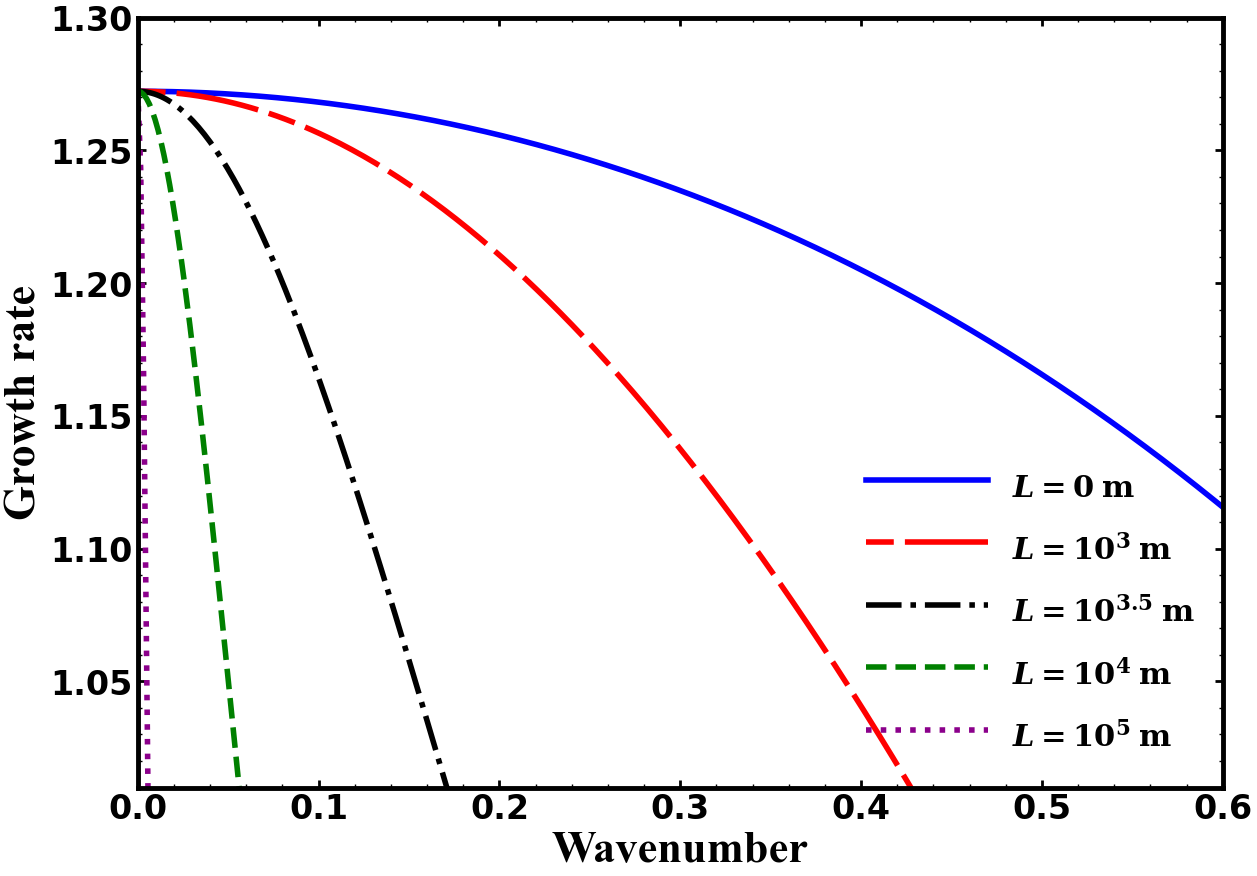

In [108]:
k_num = np.linspace(0,16,10000)
with plt.style.context(['science','notebook']):
    plt.figure(figsize=(14,10))
    plt.xlim(0,0.6)
    plt.ylim(1.01,1.3)
    #plt.xlim(0,0.6)
    #plt.ylim(-0.12,0)
    custom_dash_pattern = [5, 2, 15, 2]
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    plt.plot(k_num, im2_f1(k_num), '-', lw=4, color='blue', label='$L= 0$ $\mathrm{m}$')
    plt.plot(k_num, im2_f2(k_num), '--', dashes=custom_dash_pattern, lw=4, color='red', label='$L=10^{3}$ $\mathrm{m}$')
    plt.plot(k_num, im2_f3(k_num), '-.', lw=4, color='black', label='$L=10^{3.5}$ $\mathrm{m}$')
    plt.plot(k_num, im2_f4(k_num), '--', lw=4, color='green', label='$L=10^{4}$ $\mathrm{m}$')
    plt.plot(k_num, im2_f5(k_num), ':', lw=4, color='darkmagenta', label='$L=10^{5}$ $\mathrm{m}$')

    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis = 'both', labelsize = 24 ,which = 'major', width = 2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)
    plt.xlabel('Wavenumber',fontsize=32,fontname='Times New Roman',fontproperties = font, weight='bold')
    plt.ylabel('Growth rate',fontsize=32,fontname='Times New Roman',fontproperties = font, weight='bold')
    font = FontProperties()
    font.set_weight('bold')
    plt.legend(fontsize=22,fancybox=True, edgecolor = 'white',loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(0.55, 1.27, '(b)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig1b_L_vary.pdf',dpi=1200)
    plt.show()

In [109]:
re2v1 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])#6755998
re2v2 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v3 = real2.subs([(L,10**(3.5)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v4 = real2.subs([(L,10**(4)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v5 = real2.subs([(L,10**(5)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])

In [110]:
re2_f1 = sp.lambdify([k],re2v1)
re2_f2 = sp.lambdify([k],re2v2)
re2_f3 = sp.lambdify([k],re2v3)
re2_f4 = sp.lambdify([k],re2v4)
re2_f5 = sp.lambdify([k],re2v5)

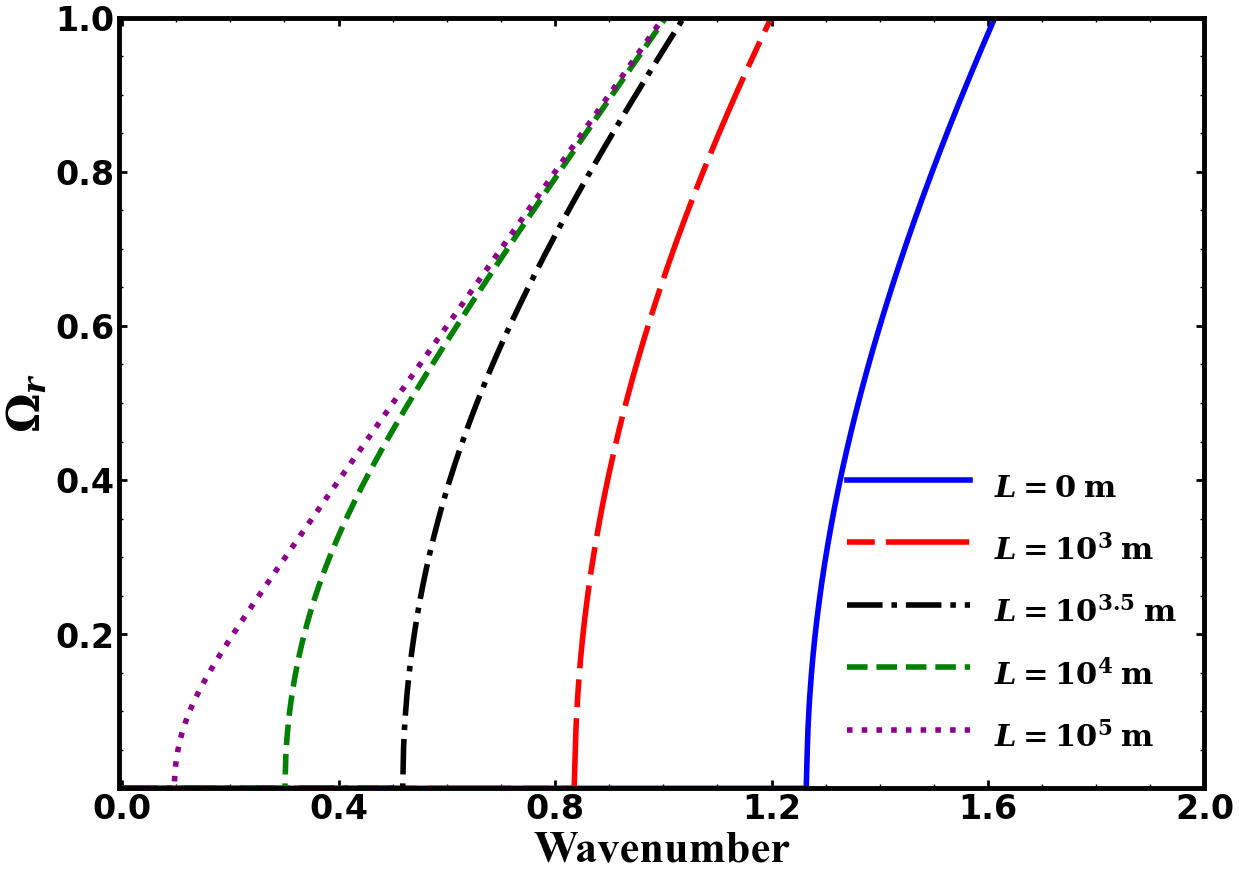

In [111]:
k_num = np.linspace(0,16,10000)
with plt.style.context(['science','notebook']):
    plt.figure(figsize=(14,10))
    plt.xlim(-0.005,2)
    plt.ylim(0.001,1)
    #plt.xlim(-0.005,0.6)
    #plt.ylim(1.05,1.235)
    #plt.xlim(0,0.6)
    #plt.ylim(-0.12,0)
    custom_dash_pattern = [5, 2, 15, 2]
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    plt.plot(k_num, re2_f1(k_num),'-' ,lw = 4 ,color = 'blue', label ='$L= 0$ $\mathrm{m}$')
    plt.plot(k_num, re2_f2(k_num),'--' ,dashes=custom_dash_pattern, lw = 4 ,color = 'red', label ='$L=10^{3}$ $\mathrm{m}$')
    plt.plot(k_num, re2_f3(k_num),'-.' ,lw = 4 ,color = 'black', label ='$L=10^{3.5}$ $\mathrm{m}$')
    plt.plot(k_num, re2_f4(k_num),'--' ,lw = 4 ,color = 'green', label ='$L=10^{4}$ $\mathrm{m}$')
    plt.plot(k_num, re2_f5(k_num),':' , lw = 4 ,color = 'darkmagenta', label ='$L=10^{5}$ $\mathrm{m}$')
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis = 'both', labelsize = 24 ,which = 'major', width = 2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)
    plt.xlabel('Wavenumber',fontsize=32,fontname='Times New Roman',fontproperties = font, weight='bold')
    plt.ylabel('$\\Omega_r$',fontsize=32,fontname='Times New Roman',fontproperties = font, weight='bold')
    font = FontProperties()
    font.set_weight('bold')
    plt.legend(fontsize=22,fancybox=True, edgecolor = 'white',loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(0.14, 0.9, '(a)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig1a_L_vary.pdf',dpi=1200)
    plt.show()

## Varied Density for L = 10^3

In [112]:
im2v1 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-4)),(c,675)])#6755998
im2v2 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v3 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-6)),(c,675)])
im2v4 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-4)),(c,675)])
im2v5 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v6 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-6)),(c,675)])

In [113]:
im2_f1 = sp.lambdify([k],im2v1)
im2_f2 = sp.lambdify([k],im2v2)
im2_f3 = sp.lambdify([k],im2v3)
im2_f4 = sp.lambdify([k],im2v4)
im2_f5 = sp.lambdify([k],im2v5)
im2_f6 = sp.lambdify([k],im2v6)

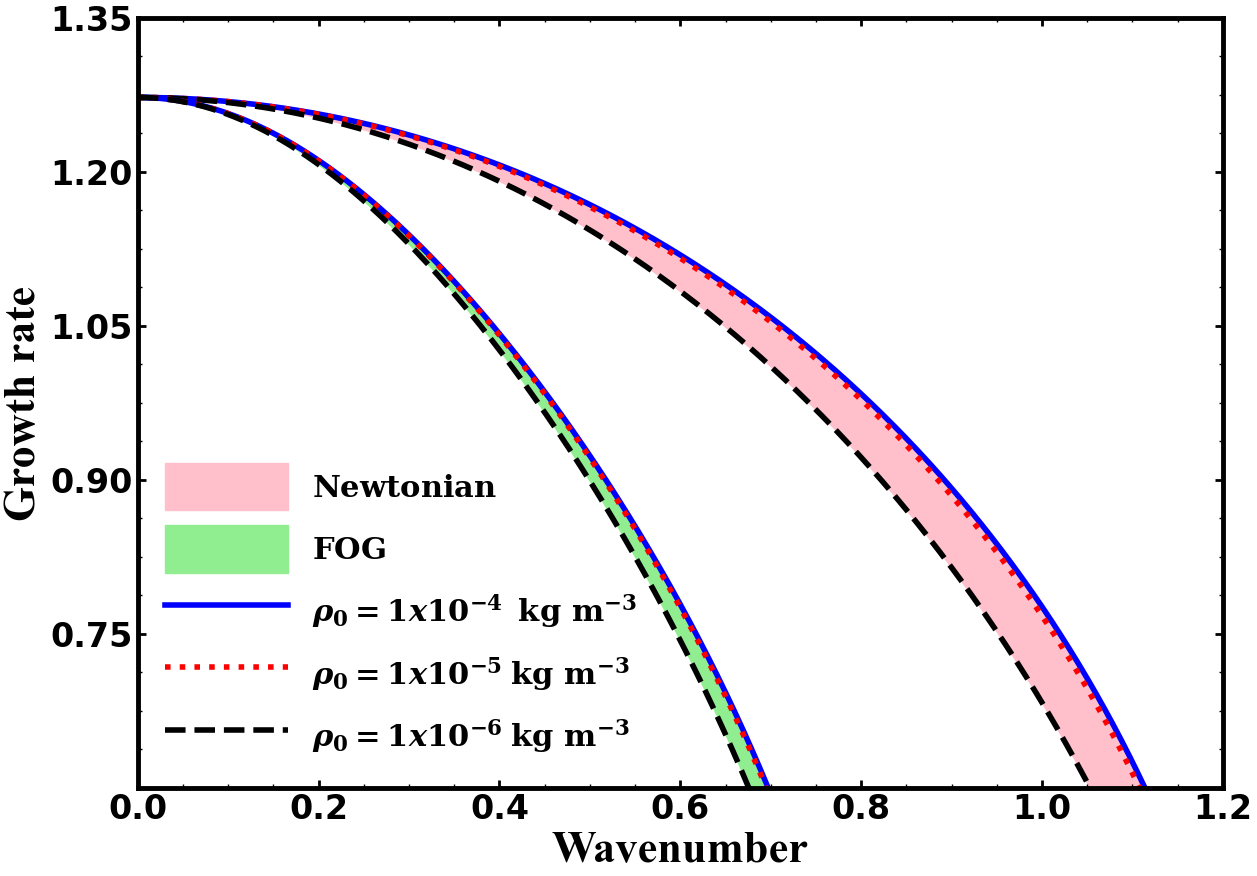

In [114]:
k_num = np.linspace(0,6,10000)
with plt.style.context(['science', 'notebook']):
    plt.figure(figsize=(14, 10))
    plt.xlim(0, 1.2)
    plt.ylim(0.6001, 1.35)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    #plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), color='lightgreen', alpha=0.3)
    plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), where=(k_num >= 0) & (k_num <= 1.2),
                     color='pink', alpha=1, label='$\mathbf{Newtonian}$') 
    plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), where=(k_num >= 0) & (k_num <= 0.7),
                     color='lightgreen', alpha=1, label='$\mathbf{FOG}$')

    plt.plot(k_num, im2_f1(k_num), '-', lw=4, color='blue', label='$\\rho_0= 1x10^{-4}$  $\mathrm{kg} \ \mathrm{m}^{-3}$')
    plt.plot(k_num, im2_f2(k_num), ':', lw=4, color='red', label='$\\rho_0= 1x10^{-5}$ $\mathrm{kg} \ \mathrm{m}^{-3}$')
    plt.plot(k_num, im2_f3(k_num), '--', lw=4, color='black', label='$\\rho_0= 1x10^{-6}$ $\mathrm{kg} \ \mathrm{m}^{-3}$')
    
   
    #plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), color='blue', alpha=0.3)
    plt.plot(k_num, im2_f4(k_num), '-', lw=4, color='blue')
    plt.plot(k_num, im2_f5(k_num), ':', lw=4, color='red')
    plt.plot(k_num, im2_f6(k_num), '--', lw=4, color='black')

    # Adding labels to shaded regions
    # plt.annotate('FOG', xy=(0.25, 1.08), xytext=(0.25, 1.08),
    #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='blue', alpha=0.5),
    #              fontsize=22, color='black', weight='bold', ha='center', va='center')

    # plt.annotate('GTR', xy=(0.45, 1.08), xytext=(0.45, 1.08),
    #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='lightgreen', facecolor='lightgreen', alpha=0.5),
    #              fontsize=22, color='black', weight='bold', ha='center', va='center')

    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis='both', labelsize=24, which='major', width=2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)

    font = FontProperties()
    font.set_weight('bold')

    plt.xlabel('Wavenumber', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')
    plt.ylabel('Growth rate', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')

    plt.legend(fontsize=22, fancybox=True, edgecolor='white', loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(1.11, 1.28, '(b)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig2b_rho_vary.pdf', dpi=1200)
    plt.show()

In [115]:
re2v1 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-4)),(c,675)])#6755998
re2v2 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v3 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-6)),(c,675)])
re2v4 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-4)),(c,675)])
re2v5 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v6 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-6)),(c,675)])

In [116]:
re2_f1 = sp.lambdify([k],re2v1)
re2_f2 = sp.lambdify([k],re2v2)
re2_f3 = sp.lambdify([k],re2v3)
re2_f4 = sp.lambdify([k],re2v4)
re2_f5 = sp.lambdify([k],re2v5)
re2_f6 = sp.lambdify([k],re2v6)

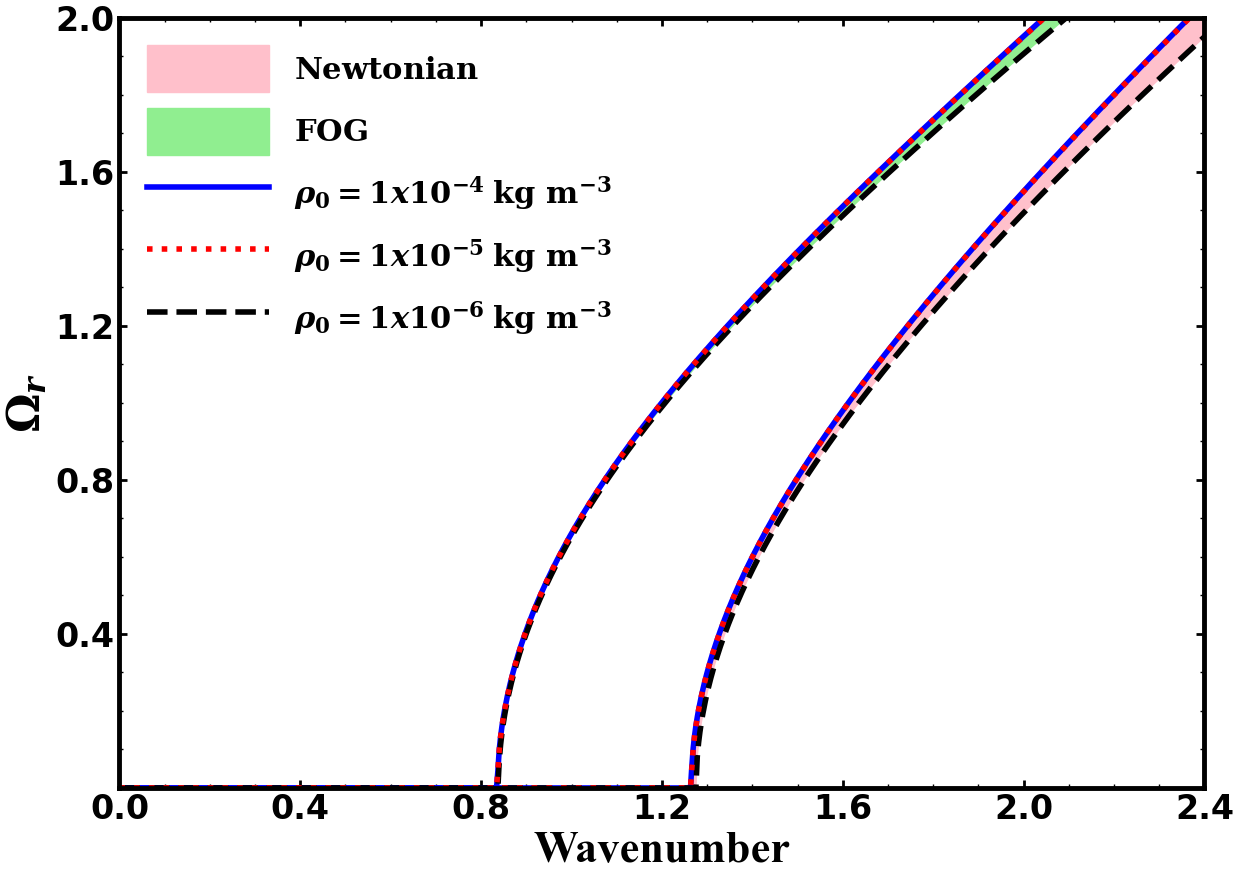

In [117]:
k_num = np.linspace(0,30,10000)
with plt.style.context(['science','notebook']):
    plt.figure(figsize=(14,10))
    plt.xlim(0.0,2.4)
    plt.ylim(0.001,2)
    #plt.xlim(-0.005,0.6)
    #plt.ylim(1.05,1.235)
    #plt.xlim(0,0.6)
    #plt.ylim(-0.12,0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    custom_dash_pattern = [5, 2, 15, 2]
    #plt.fill_between(k_num, re2_f1(k_num), re2_f3(k_num), color='lightgreen', alpha=0.3)
    plt.fill_between(k_num, re2_f1(k_num), re2_f3(k_num), where=(k_num >= 0.8) & (k_num <= 3),
                     color='pink', alpha=1, label='$\mathbf{Newtonian}$') 
    plt.fill_between(k_num, re2_f4(k_num), re2_f6(k_num), where=(k_num >= 0.8) & (k_num <= 3),
                     color='lightgreen', alpha=1, label='$\mathbf{FOG}$')
    
    plt.plot(k_num, re2_f1(k_num), '-', lw=4, color='blue', label='$\\rho_0= 1x10^{-4}$ $\mathrm{kg} \ \mathrm{m}^{-3}$')
    plt.plot(k_num, re2_f3(k_num), '--', lw=4, color='black')
    plt.plot(k_num, re2_f2(k_num), ':', lw=4, color='red', label='$\\rho_0= 1x10^{-5}$ $\mathrm{kg} \ \mathrm{m}^{-3}$')
    
    plt.plot(k_num, re2_f4(k_num), '-', lw=4, color='blue')
    plt.plot(k_num, re2_f6(k_num), '--', lw=4, color='black', label='$\\rho_0= 1x10^{-6}$ $\mathrm{kg} \ \mathrm{m}^{-3}$')
    plt.plot(k_num, re2_f5(k_num), ':', lw=4, color='red')
    
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis = 'both', labelsize = 24 ,which = 'major', width = 2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)
    plt.xlabel('Wavenumber',fontsize=32,fontname='Times New Roman',fontproperties = font, weight='bold')
    plt.ylabel('$\\Omega_r$',fontsize=32,fontname='Times New Roman',fontproperties = font, weight='bold')
    font = FontProperties()
    font.set_weight('bold')
    plt.legend(fontsize=22,fancybox=True, edgecolor = 'white',loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(0.15, 0.15, '(a)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig2a_rho_vary.pdf',dpi=1200)
    plt.show()

## Varied $\tau_m$

In [118]:
im2v1 = img2.subs([(L,0),(tau_m, 10**(-1)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])#6755998
im2v2 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v3 = img2.subs([(L,0),(tau_m, 10**(-3)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v4 = img2.subs([(L,10**(3)),(tau_m, 10**(-1)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v5 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v6 = img2.subs([(L,10**(3)),(tau_m, 10**(-3)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])

In [119]:
im2_f1 = sp.lambdify([k],im2v1)
im2_f2 = sp.lambdify([k],im2v2)
im2_f3 = sp.lambdify([k],im2v3)
im2_f4 = sp.lambdify([k],im2v4)
im2_f5 = sp.lambdify([k],im2v5)
im2_f6 = sp.lambdify([k],im2v6)

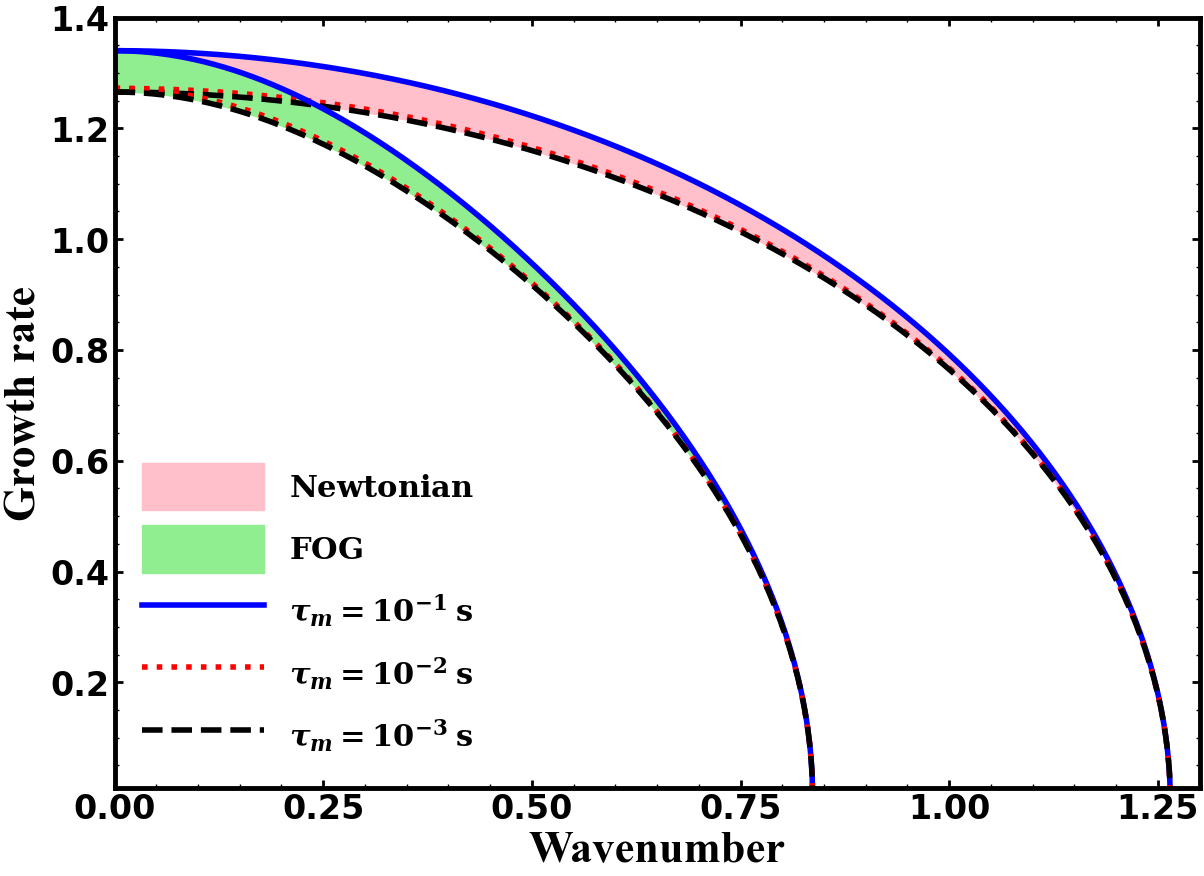

In [120]:
k_num = np.linspace(0,6,10000)
with plt.style.context(['science', 'notebook']):
    plt.figure(figsize=(14, 10))
    plt.xlim(0, 1.3)
    plt.ylim(0.01, 1.40)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    #plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), color='lightgreen', alpha=0.3)
    plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), where=(k_num >= 0) & (k_num <= 1.7),
                     color='pink', alpha=1, label='$\mathbf{Newtonian}$') 
    plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), where=(k_num >= 0) & (k_num <= 1.7),
                     color='lightgreen', alpha=1, label='$\mathbf{FOG}$')
    
    plt.plot(k_num, im2_f1(k_num), '-', lw=4, color='blue', label='$\\tau_m= 10^{-1}$ $\mathrm{s}$')
    plt.plot(k_num, im2_f2(k_num), ':', lw=4, color='red', label='$\\tau_m= 10^{-2}$ $\mathrm{s}$')
    plt.plot(k_num, im2_f3(k_num), '--', lw=4, color='black', label='$\\tau_m= 10^{-3}$ $\mathrm{s}$')
    
   
    #plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), color='blue', alpha=0.3)
    plt.plot(k_num, im2_f4(k_num), '-', lw=4, color='blue')
    plt.plot(k_num, im2_f5(k_num), ':', lw=4, color='red')
    plt.plot(k_num, im2_f6(k_num), '--', lw=4, color='black')

    # Adding labels to shaded regions
    # plt.annotate('$\mathbf{FOG}$', xy=(0.25, 1.08), xytext=(0.25, 1.08),
    #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='blue', alpha=0.5),
    #              fontsize=22, color='black', weight='bold', ha='center', va='center')

    # plt.annotate('GTR', xy=(0.45, 1.08), xytext=(0.45, 1.08),
    #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='lightgreen', facecolor='lightgreen', alpha=0.5),
    #              fontsize=22, color='black', weight='bold', ha='center', va='center')

    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis='both', labelsize=24, which='major', width=2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)

    font = FontProperties()
    font.set_weight('bold')

    plt.xlabel('Wavenumber', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')
    plt.ylabel('Growth rate', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')

    plt.legend(fontsize=22, fancybox=True, edgecolor='white', loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(1.21, 1.3, '(b)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig3b_tauM_vary.pdf', dpi=1200)
    plt.show()

In [121]:
re2v1 = real2.subs([(L,0),(tau_m, 10**(-1)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])#6755998
re2v2 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v3 = real2.subs([(L,0),(tau_m, 10**(-3)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v4 = real2.subs([(L,10**(3)),(tau_m, 10**(-1)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v5 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v6 = real2.subs([(L,10**(3)),(tau_m, 10**(-3)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])

In [122]:
re2_f1 = sp.lambdify([k],re2v1)
re2_f2 = sp.lambdify([k],re2v2)
re2_f3 = sp.lambdify([k],re2v3)
re2_f4 = sp.lambdify([k],re2v4)
re2_f5 = sp.lambdify([k],re2v5)
re2_f6 = sp.lambdify([k],re2v6)

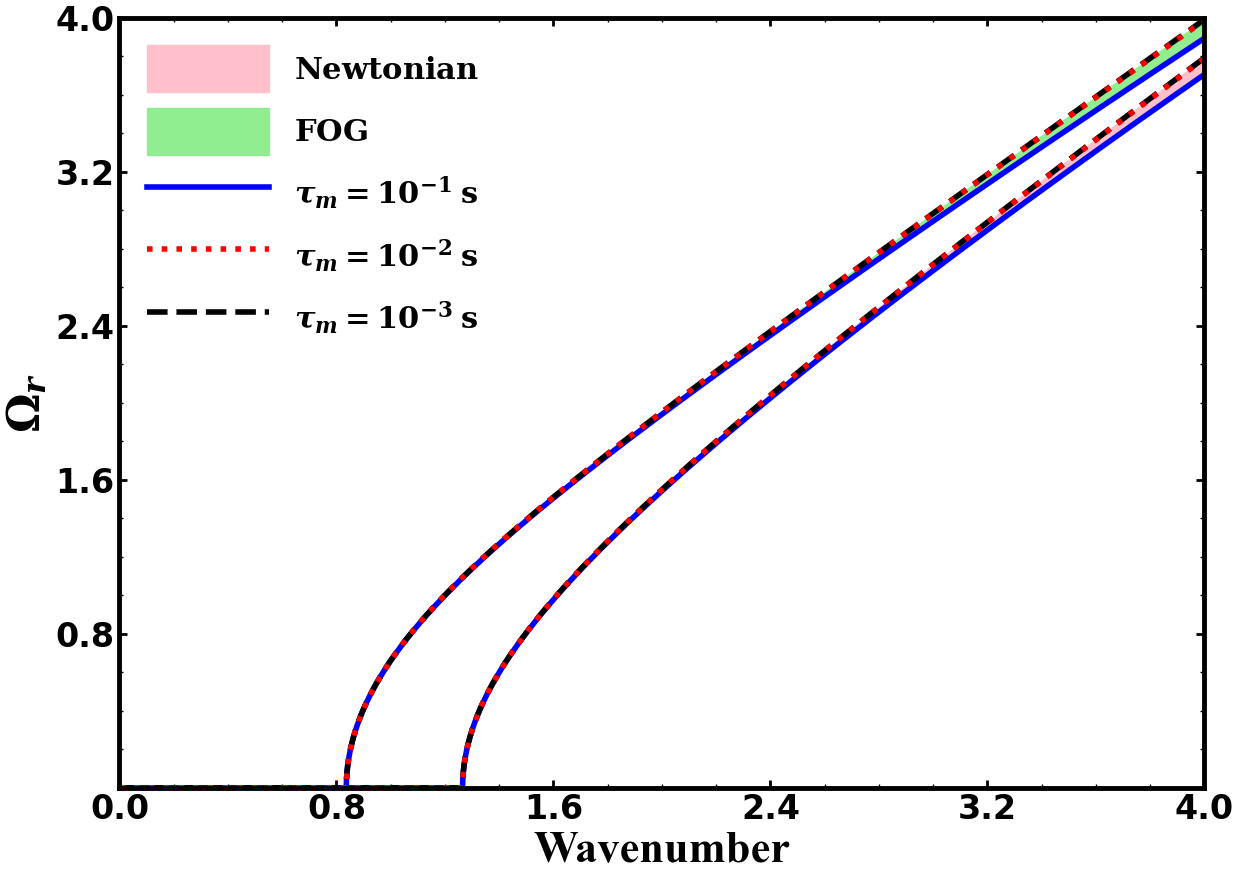

In [123]:
k_num = np.linspace(0,10,10000)
with plt.style.context(['science','notebook']):
    plt.figure(figsize=(14,10))
    plt.xlim(0,4)
    plt.ylim(0.001,4)
    #plt.xlim(-0.005,0.6)
    #plt.ylim(1.05,1.235)
    #plt.xlim(0,0.6)
    #plt.ylim(-0.12,0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    custom_dash_pattern = [5, 2, 15, 2]
    #plt.fill_between(k_num, re2_f1(k_num), re2_f3(k_num), color='lightgreen', alpha=0.3)
    plt.fill_between(k_num, re2_f1(k_num), re2_f3(k_num), where=(k_num >= 0.4) & (k_num <= 4),
                     color='pink', alpha=1, label='$\mathbf{Newtonian}$') 
    plt.fill_between(k_num, re2_f4(k_num), re2_f6(k_num), where=(k_num >= 0.4) & (k_num <= 4),
                     color='lightgreen', alpha=1, label='$\mathbf{FOG}$')
    
    plt.plot(k_num, re2_f1(k_num), '-', lw=4, color='blue', label='$\\tau_m= 10^{-1}$ $\mathrm{s}$')
    plt.plot(k_num, re2_f3(k_num), '--', lw=4, color='black')
    plt.plot(k_num, re2_f2(k_num), ':', lw=4, color='red', label='$\\tau_m= 10^{-2}$ $\mathrm{s}$')
    
    plt.plot(k_num, re2_f4(k_num), '-', lw=4, color='blue')
    plt.plot(k_num, re2_f6(k_num), '--', lw=4, color='black', label='$\\tau_m= 10^{-3}$ $\mathrm{s}$')
    plt.plot(k_num, re2_f5(k_num), ':', lw=4, color='red')
    
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis = 'both', labelsize = 24 ,which = 'major', width = 2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)
    plt.xlabel('Wavenumber',fontsize=32,fontname='Times New Roman',fontproperties = font, weight='bold')
    plt.ylabel('$\\Omega_r$',fontsize=32,fontname='Times New Roman',fontproperties = font, weight='bold')
    font = FontProperties()
    font.set_weight('bold')
    plt.legend(fontsize=22,fancybox=True, edgecolor = 'white',loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(0.2, 0.2, '(a)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig3a_tauM_vary.pdf',dpi=1200)
    plt.show()

## Varied $T_0$

In [124]:
im2_f1 = sp.lambdify([k],im2v1)
im2_f2 = sp.lambdify([k],im2v2)
im2_f3 = sp.lambdify([k],im2v3)
im2_f4 = sp.lambdify([k],im2v4)
im2_f5 = sp.lambdify([k],im2v5)
im2_f6 = sp.lambdify([k],im2v6)

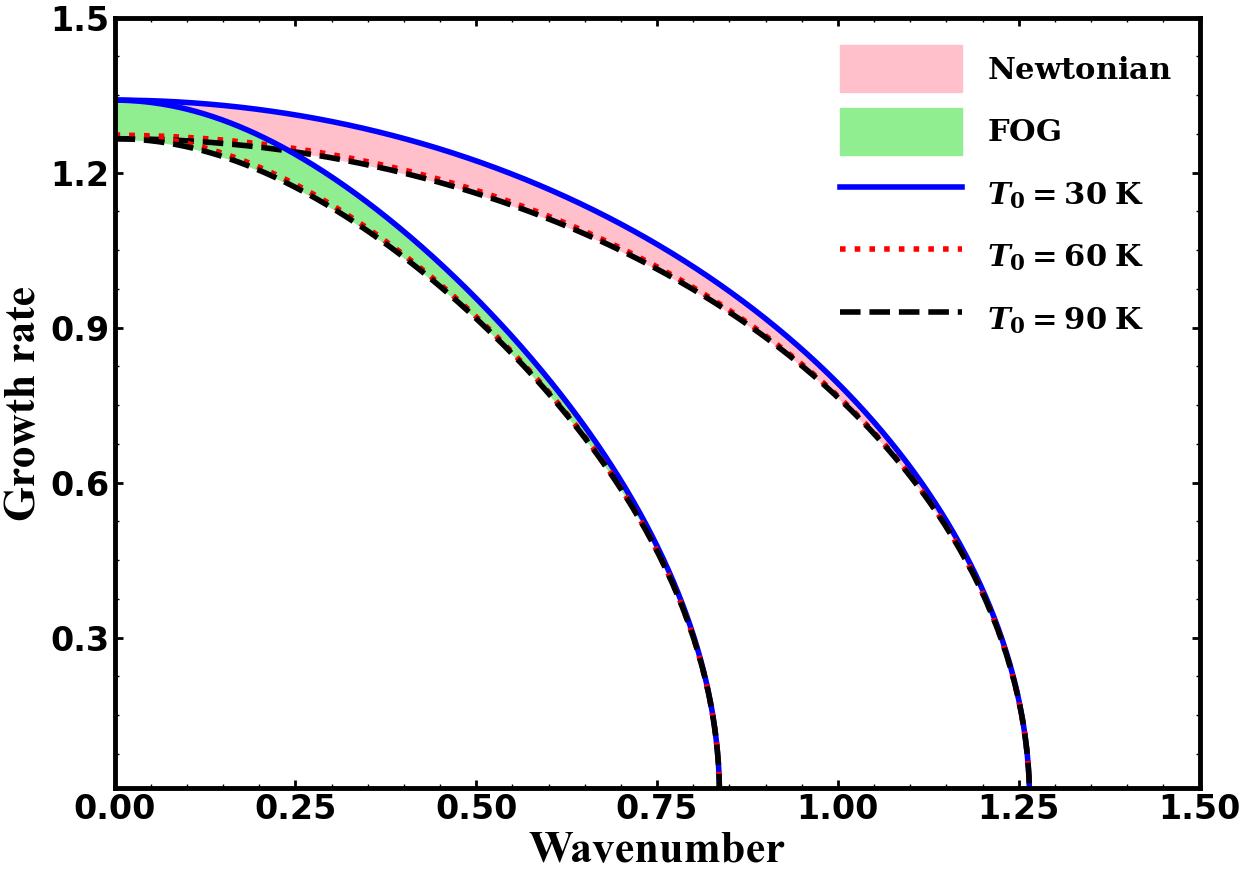

In [125]:
k_num = np.linspace(0,6,10000)
with plt.style.context(['science', 'notebook']):
    plt.figure(figsize=(14, 10))
    plt.xlim(0, 1.5)
    plt.ylim(0.01, 1.5)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    #plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), color='lightgreen', alpha=0.3)
    plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), where=(k_num >= 0) & (k_num <= 1.7),
                     color='pink', alpha=1, label='$\mathbf{Newtonian}$') 
    plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), where=(k_num >= 0) & (k_num <= 1.7),
                     color='lightgreen', alpha=1, label='$\mathbf{FOG}$')
    
    plt.plot(k_num, im2_f1(k_num), '-', lw=4, color='blue', label='$T_0= 30$ $\mathrm{K}$')
    plt.plot(k_num, im2_f2(k_num), ':', lw=4, color='red', label='$T_0= 60$ $\mathrm{K}$')
    plt.plot(k_num, im2_f3(k_num), '--', lw=4, color='black', label='$T_0= 90$ $\mathrm{K}$')
    
   
    #plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), color='blue', alpha=0.3)
    plt.plot(k_num, im2_f4(k_num), '-', lw=4, color='blue')
    plt.plot(k_num, im2_f5(k_num), ':', lw=4, color='red')
    plt.plot(k_num, im2_f6(k_num), '--', lw=4, color='black')

    # Adding labels to shaded regions
    # plt.annotate('$\mathbf{FOG}$', xy=(0.25, 1.08), xytext=(0.25, 1.08),
    #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='blue', alpha=0.5),
    #              fontsize=22, color='black', weight='bold', ha='center', va='center')

    # plt.annotate('GTR', xy=(0.45, 1.08), xytext=(0.45, 1.08),
    #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='lightgreen', facecolor='lightgreen', alpha=0.5),
    #              fontsize=22, color='black', weight='bold', ha='center', va='center')

    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis='both', labelsize=24, which='major', width=2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)

    font = FontProperties()
    font.set_weight('bold')

    plt.xlabel('Wavenumber', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')
    plt.ylabel('Growth rate', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')

    plt.legend(fontsize=22, fancybox=True, edgecolor='white', loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(1.40, 1.4, '(b)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig4b_T0_vary.pdf',dpi=1200)
    plt.show()

In [126]:
re2v1 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,30),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])#6755998
re2v2 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v3 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,90),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v4 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,30),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v5 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v6 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,90),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])

In [127]:
re2_f1 = sp.lambdify([k],re2v1)
re2_f2 = sp.lambdify([k],re2v2)
re2_f3 = sp.lambdify([k],re2v3)
re2_f4 = sp.lambdify([k],re2v4)
re2_f5 = sp.lambdify([k],re2v5)
re2_f6 = sp.lambdify([k],re2v6)

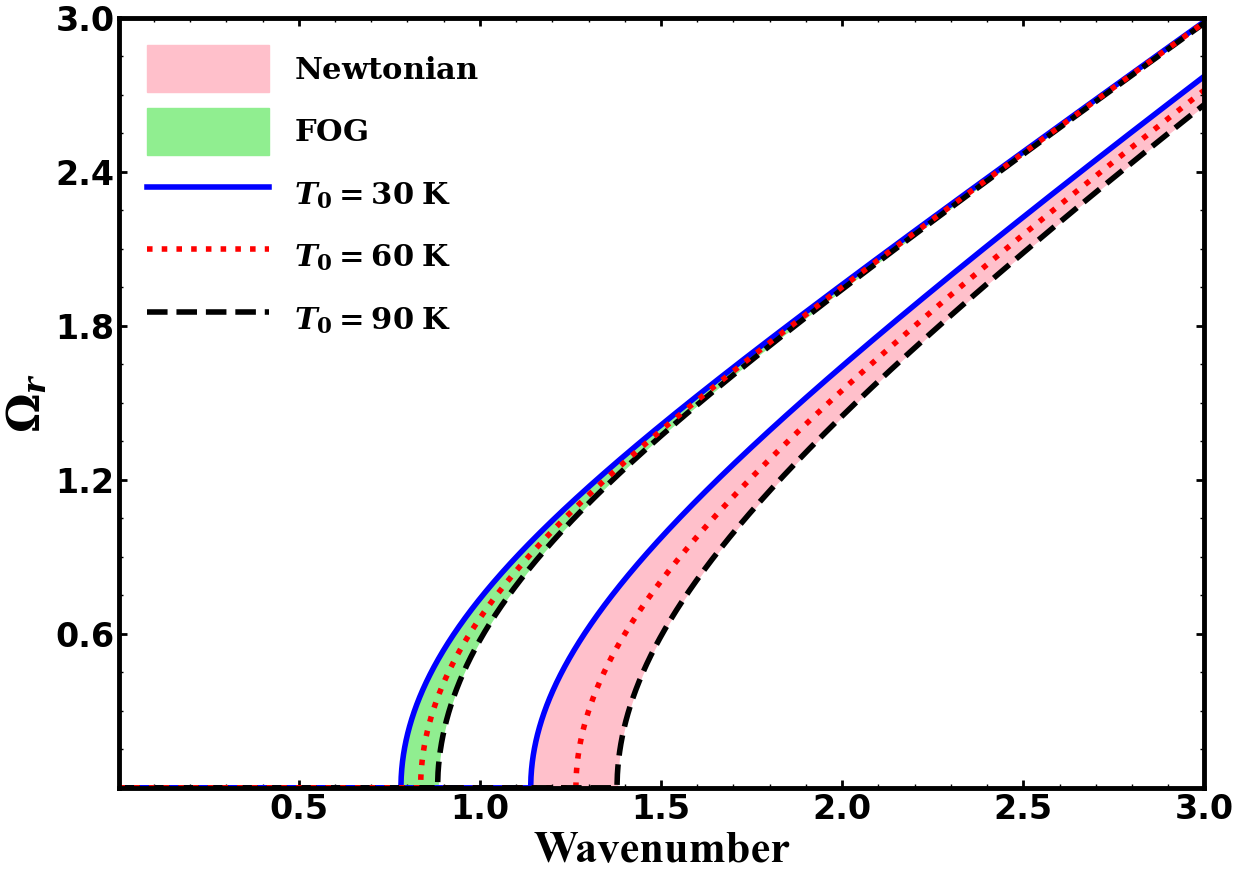

In [128]:
k_num = np.linspace(0,3,10000)
with plt.style.context(['science','notebook']):
    plt.figure(figsize=(14,10))
    plt.xlim(0.005,3)
    plt.ylim(0.001,3)
    #plt.xlim(-0.005,0.6)
    #plt.ylim(1.05,1.235)
    #plt.xlim(0,0.6)
    #plt.ylim(-0.12,0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    custom_dash_pattern = [5, 2, 15, 2]
    #plt.fill_between(k_num, re2_f1(k_num), re2_f3(k_num), color='lightgreen', alpha=0.3)
    plt.fill_between(k_num, re2_f1(k_num), re2_f3(k_num), where=(k_num >= 0.4) & (k_num <= 4),
                     color='pink', alpha=1, label='$\mathbf{Newtonian}$') 
    plt.fill_between(k_num, re2_f4(k_num), re2_f6(k_num), where=(k_num >= 0.4) & (k_num <= 4),
                     color='lightgreen', alpha=1, label='$\mathbf{FOG}$')
    
    plt.plot(k_num, re2_f1(k_num), '-', lw=4, color='blue', label='$T_0= 30$ $\mathrm{K}$')
    plt.plot(k_num, re2_f2(k_num), ':', lw=4, color='red', label='$T_0= 60$ $\mathrm{K}$')
    plt.plot(k_num, re2_f3(k_num), '--', lw=4, color='black', label='$T_0= 90$ $\mathrm{K}$')
    
    plt.plot(k_num, re2_f4(k_num), '-', lw=4, color='blue')
    plt.plot(k_num, re2_f6(k_num), '--', lw=4, color='black')
    plt.plot(k_num, re2_f5(k_num), ':', lw=4, color='red')
    
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis = 'both', labelsize = 24 ,which = 'major', width = 2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)
    plt.xlabel('Wavenumber',fontsize=32,fontname='Times New Roman',fontproperties = font, weight='bold')
    plt.ylabel('$\\Omega_r$',fontsize=32,fontname='Times New Roman',fontproperties = font, weight='bold')
    font = FontProperties()
    font.set_weight('bold')
    plt.legend(fontsize=22,fancybox=True, edgecolor = 'white',loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(0.2, 0.15, '(a)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig4a_T0_vary.pdf',dpi=1200)
    plt.show()

## Polytropic variation

In [129]:
im2v1 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])#6755998
im2v2 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,4/3),(rho,10**(-5)),(c,675)])
im2v3 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,3/2),(rho,10**(-5)),(c,675)])
im2v4 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v5 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,4/3),(rho,10**(-5)),(c,675)])
im2v6 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,3/2),(rho,10**(-5)),(c,675)])

In [130]:
im2_f1 = sp.lambdify([k],im2v1)
im2_f2 = sp.lambdify([k],im2v2)
im2_f3 = sp.lambdify([k],im2v3)
im2_f4 = sp.lambdify([k],im2v4)
im2_f5 = sp.lambdify([k],im2v5)
im2_f6 = sp.lambdify([k],im2v6)

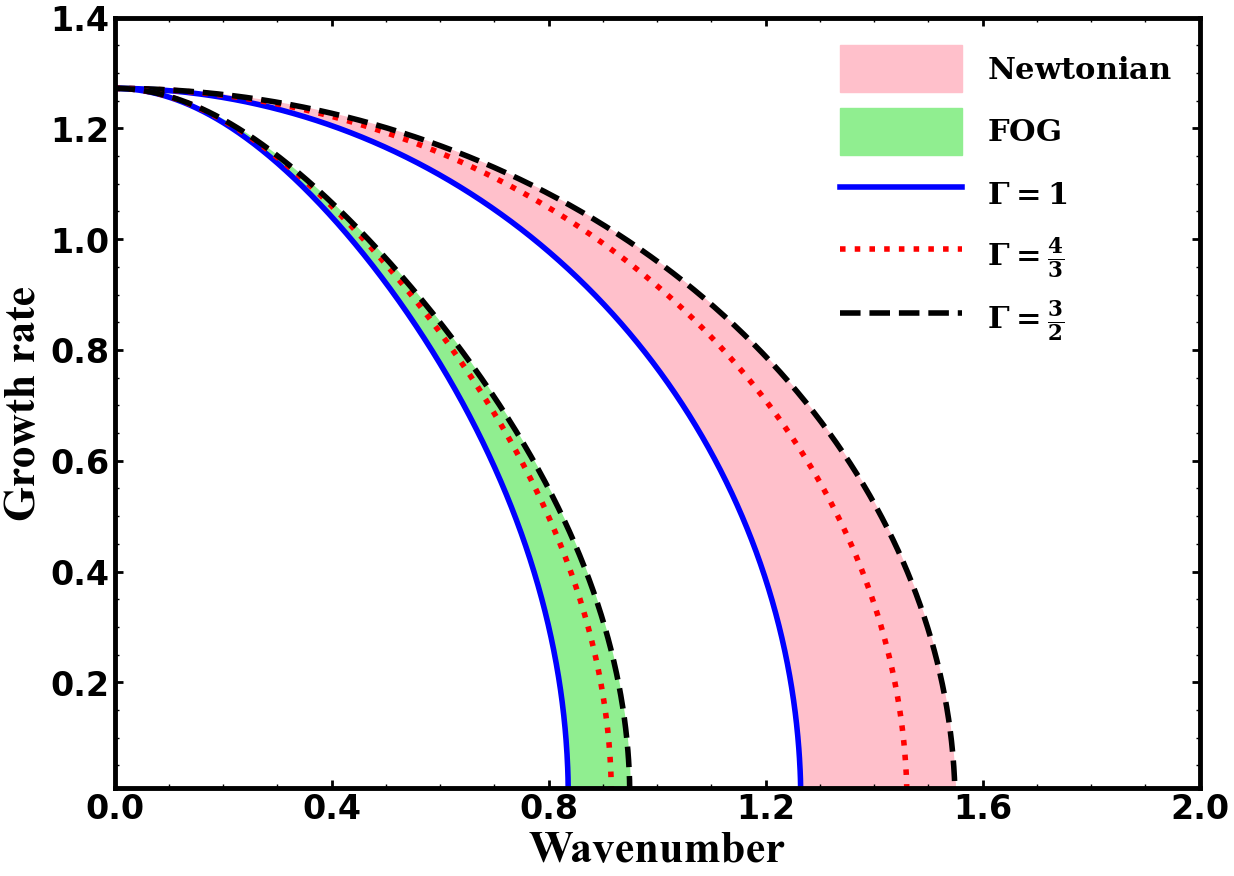

In [131]:
k_num = np.linspace(0,6,10000)
with plt.style.context(['science', 'notebook']):
    plt.figure(figsize=(14, 10))
    plt.xlim(0, 2)
    plt.ylim(0.01, 1.40)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    #plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), color='lightgreen', alpha=0.3)
    plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), where=(k_num >= 0) & (k_num <= 2),
                     color='pink', alpha=1, label='$\mathbf{Newtonian}$') 
    plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), where=(k_num >= 0) & (k_num <= 1.7),
                     color='lightgreen', alpha=1, label='$\mathbf{FOG}$')
    
    plt.plot(k_num, im2_f1(k_num), '-', lw=4, color='blue', label='$\\Gamma = 1$')
    plt.plot(k_num, im2_f2(k_num), ':', lw=4, color='red', label='$\\Gamma = \\frac{4}{3}$')
    plt.plot(k_num, im2_f3(k_num), '--', lw=4, color='black', label='$\\Gamma = \\frac{3}{2}$')
    
   
    #plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), color='blue', alpha=0.3)
    plt.plot(k_num, im2_f4(k_num), '-', lw=4, color='blue')
    plt.plot(k_num, im2_f5(k_num), ':', lw=4, color='red')
    plt.plot(k_num, im2_f6(k_num), '--', lw=4, color='black')

    # Adding labels to shaded regions
    # plt.annotate('$\mathbf{FOG}$', xy=(0.25, 1.08), xytext=(0.25, 1.08),
    #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='blue', alpha=0.5),
    #              fontsize=22, color='black', weight='bold', ha='center', va='center')

    # plt.annotate('GTR', xy=(0.45, 1.08), xytext=(0.45, 1.08),
    #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='lightgreen', facecolor='lightgreen', alpha=0.5),
    #              fontsize=22, color='black', weight='bold', ha='center', va='center')

    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis='both', labelsize=24, which='major', width=2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)

    font = FontProperties()
    font.set_weight('bold')

    plt.xlabel('Wavenumber', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')
    plt.ylabel('Growth rate', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')

    plt.legend(fontsize=22, fancybox=True, edgecolor='white', loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(8))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(0.1, 0.12, '(b)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig5b_Gamma_vary.pdf',dpi=1200)
    plt.show()

In [132]:
re2v1 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])#6755998
re2v2 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,4/3),(rho,10**(-5)),(c,675)])
re2v3 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,3/2),(rho,10**(-5)),(c,675)])
re2v4 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v5 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,4/3),(rho,10**(-5)),(c,675)])
re2v6 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,10**(-2)),(tau_J,  1.091948024),(Gamma,3/2),(rho,10**(-5)),(c,675)])

In [133]:
re2_f1 = sp.lambdify([k],re2v1)
re2_f2 = sp.lambdify([k],re2v2)
re2_f3 = sp.lambdify([k],re2v3)
re2_f4 = sp.lambdify([k],re2v4)
re2_f5 = sp.lambdify([k],re2v5)
re2_f6 = sp.lambdify([k],re2v6)

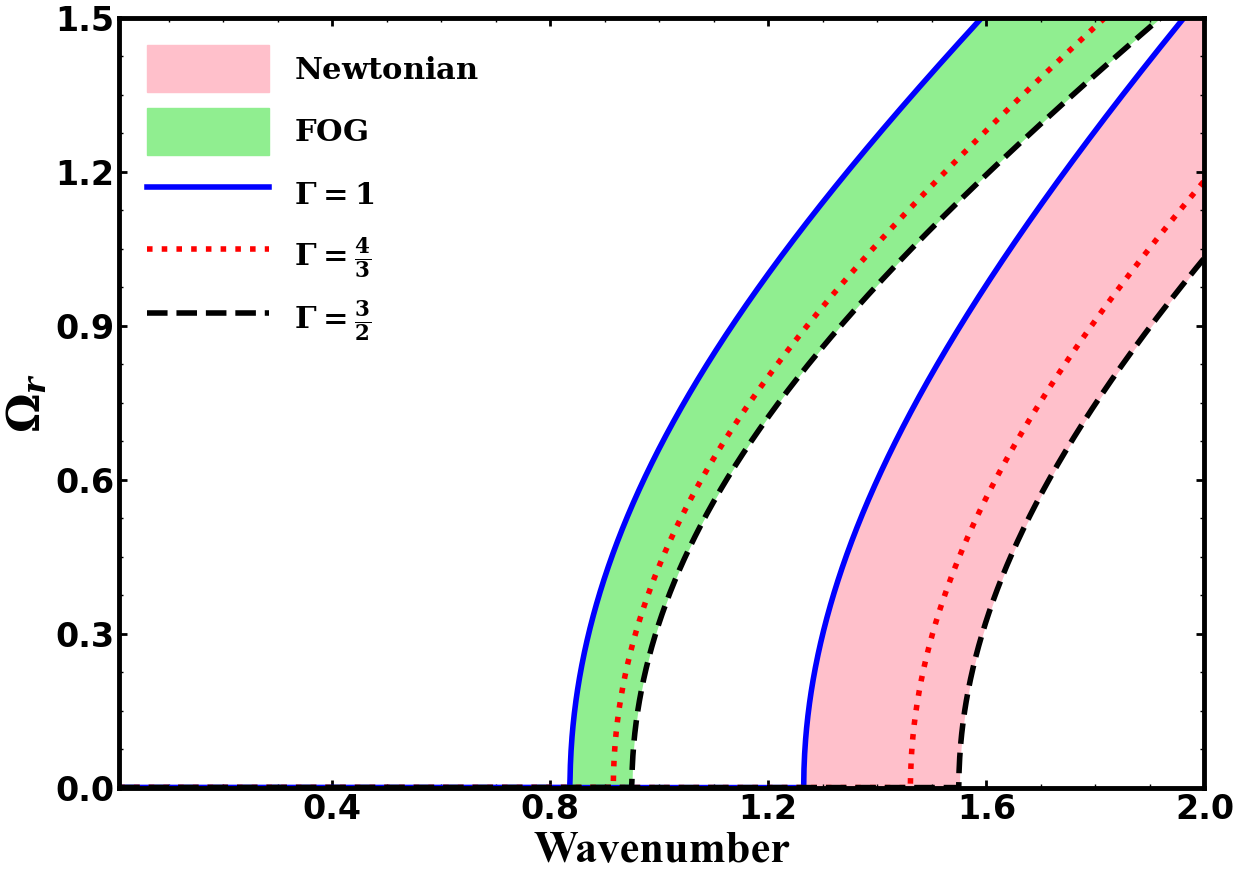

In [134]:
k_num = np.linspace(0,6,10000)
with plt.style.context(['science', 'notebook']):
    plt.figure(figsize=(14, 10))
    plt.xlim(0.01, 2)
    plt.ylim(0, 1.5)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    #plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), color='lightgreen', alpha=0.3)
    plt.fill_between(k_num, re2_f1(k_num), re2_f3(k_num), where=(k_num >= 0) & (k_num <= 2),
                     color='pink', alpha=1, label='$\mathbf{Newtonian}$') 
    plt.fill_between(k_num, re2_f4(k_num), re2_f6(k_num), where=(k_num >= 0) & (k_num <= 2),
                     color='lightgreen', alpha=1, label='$\mathbf{FOG}$')
    
    plt.plot(k_num, re2_f1(k_num), '-', lw=4, color='blue', label='$\\Gamma = 1$')
    plt.plot(k_num, re2_f2(k_num), ':', lw=4, color='red', label='$\\Gamma = \\frac{4}{3}$')
    plt.plot(k_num, re2_f3(k_num), '--', lw=4, color='black', label='$\\Gamma = \\frac{3}{2}$')
    
   
    #plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), color='blue', alpha=0.3)
    plt.plot(k_num, re2_f4(k_num), '-', lw=4, color='blue')
    plt.plot(k_num, re2_f5(k_num), ':', lw=4, color='red')
    plt.plot(k_num, re2_f6(k_num), '--', lw=4, color='black')

    # Adding labels to shaded regions
    # plt.annotate('$\mathbf{FOG}$', xy=(0.25, 1.08), xytext=(0.25, 1.08),
    #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='blue', alpha=0.5),
    #              fontsize=22, color='black', weight='bold', ha='center', va='center')

    # plt.annotate('GTR', xy=(0.45, 1.08), xytext=(0.45, 1.08),
    #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='lightgreen', facecolor='lightgreen', alpha=0.5),
    #              fontsize=22, color='black', weight='bold', ha='center', va='center')

    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis='both', labelsize=24, which='major', width=2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)

    font = FontProperties()
    font.set_weight('bold')

    plt.xlabel('Wavenumber', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')
    plt.ylabel('$\\Omega_r$', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')

    plt.legend(fontsize=22, fancybox=True, edgecolor='white', loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(0.11, 0.12, '(a)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig5a_Gamma_vary.pdf',dpi=1200)
    plt.show()

## Volumetric expansion variation

In [135]:
im2v1 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,1*10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])#6755998
im2v2 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,2*10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v3 = img2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,3*10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v4 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,1*10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v5 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,2*10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
im2v6 = img2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,3*10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])

In [136]:
im2_f1 = sp.lambdify([k],im2v1)
im2_f2 = sp.lambdify([k],im2v2)
im2_f3 = sp.lambdify([k],im2v3)
im2_f4 = sp.lambdify([k],im2v4)
im2_f5 = sp.lambdify([k],im2v5)
im2_f6 = sp.lambdify([k],im2v6)

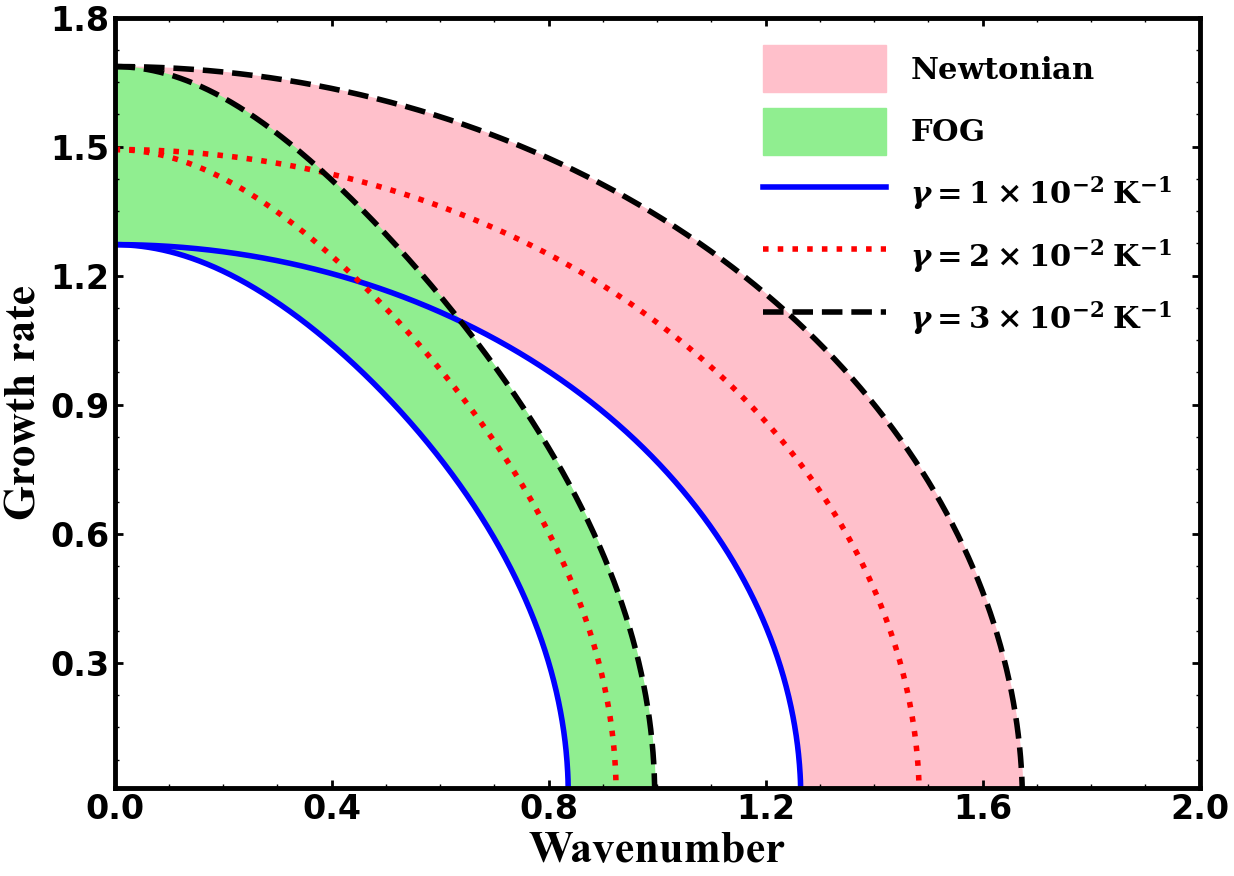

In [137]:
k_num = np.linspace(0,6,10000)
with plt.style.context(['science', 'notebook']):
    plt.figure(figsize=(14, 10))
    plt.xlim(0, 2)
    plt.ylim(0.01, 1.8)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    #plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), color='lightgreen', alpha=0.3)
    plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), where=(k_num >= 0) & (k_num <= 2),
                     color='pink', alpha=1, label='$\mathbf{Newtonian}$') 
    plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), where=(k_num >= 0) & (k_num <= 1.7),
                     color='lightgreen', alpha=1, label='$\mathbf{FOG}$')
    
    plt.plot(k_num, im2_f1(k_num), '-', lw=4, color='blue', label='$\\gamma = 1\\times 10^{-2}$ $\mathrm{K}^{-1}$')
    plt.plot(k_num, im2_f3(k_num), '--', lw=4, color='black')
    plt.plot(k_num, im2_f2(k_num), ':', lw=4, color='red', label='$\\gamma = 2\\times 10^{-2}$ $\mathrm{K}^{-1}$')
   
    #plt.fill_between(k_num, im2_f4(k_num), im2_f6(k_num), color='blue', alpha=0.3)
    plt.plot(k_num, im2_f4(k_num), '-', lw=4, color='blue')
    plt.plot(k_num, im2_f5(k_num), ':', lw=4, color='red')
    plt.plot(k_num, im2_f6(k_num), '--', lw=4, color='black', label='$\\gamma = 3\\times 10^{-2}$ $\mathrm{K}^{-1}$')

    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis='both', labelsize=24, which='major', width=2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)

    font = FontProperties()
    font.set_weight('bold')

    plt.xlabel('Wavenumber', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')
    plt.ylabel('Growth rate', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')

    plt.legend(fontsize=22, fancybox=True, edgecolor='white', loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(0.1, 0.12, '(b)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig6b_gamma_vary.pdf',dpi=1200)
    plt.show()

In [138]:
re2v1 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,1*10**(-2)),(tau_J, 1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])#6755998
re2v2 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,2*10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v3 = real2.subs([(L,0),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,3*10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v4 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,1*10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v5 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,2*10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])
re2v6 = real2.subs([(L,10**(3)),(tau_m, 10**(-2)),(beta, 10**(-1)),(T,60),(gamma,3*10**(-2)),(tau_J,  1.091948024),(Gamma,1),(rho,10**(-5)),(c,675)])

In [139]:
re2_f1 = sp.lambdify([k],re2v1)
re2_f2 = sp.lambdify([k],re2v2)
re2_f3 = sp.lambdify([k],re2v3)
re2_f4 = sp.lambdify([k],re2v4)
re2_f5 = sp.lambdify([k],re2v5)
re2_f6 = sp.lambdify([k],re2v6)

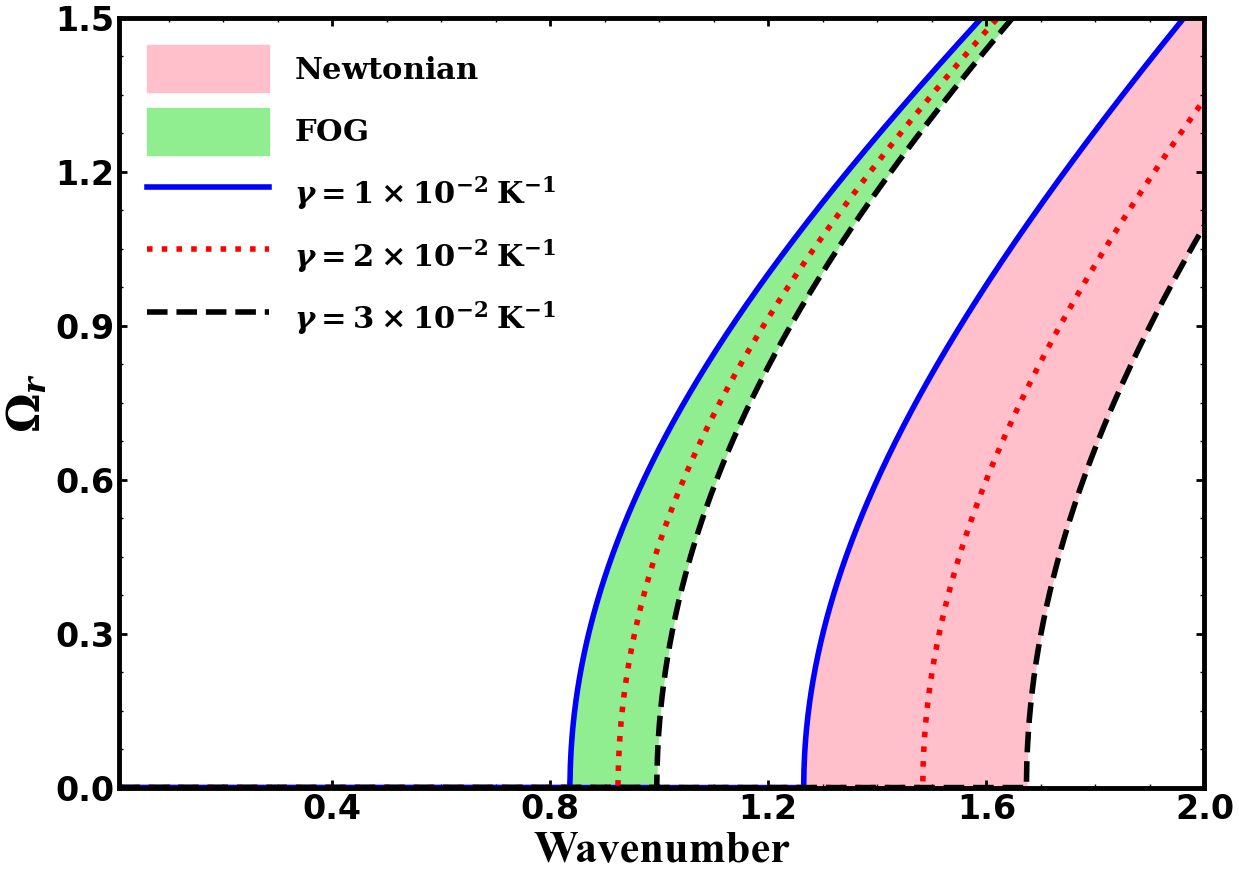

In [140]:
k_num = np.linspace(0,6,10000)
with plt.style.context(['science', 'notebook']):
    plt.figure(figsize=(14, 10))
    plt.xlim(0.01, 2)
    plt.ylim(0, 1.5)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    #plt.fill_between(k_num, im2_f1(k_num), im2_f3(k_num), color='lightgreen', alpha=0.3)
    plt.fill_between(k_num, re2_f1(k_num), re2_f3(k_num), where=(k_num >= 0) & (k_num <= 2),
                     color='pink', alpha=1, label='$\mathbf{Newtonian}$') 
    plt.fill_between(k_num, re2_f4(k_num), re2_f6(k_num), where=(k_num >= 0) & (k_num <= 2),
                     color='lightgreen', alpha=1, label='$\mathbf{FOG}$')
    
    plt.plot(k_num, re2_f1(k_num), '-', lw=4, color='blue', label='$\\gamma = 1\\times 10^{-2}$ $\mathrm{K}^{-1}$')
    plt.plot(k_num, re2_f2(k_num), ':', lw=4, color='red', label='$\\gamma = 2\\times 10^{-2}$ $\mathrm{K}^{-1}$')
    plt.plot(k_num, re2_f3(k_num), '--', lw=4, color='black', label='$\\gamma = 3\\times 10^{-2}$ $\mathrm{K}^{-1}$')
    
    plt.plot(k_num, re2_f4(k_num), '-', lw=4, color='blue')
    plt.plot(k_num, re2_f5(k_num), ':', lw=4, color='red')
    plt.plot(k_num, re2_f6(k_num), '--', lw=4, color='black')
    
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.tick_params(axis='both', labelsize=24, which='major', width=2)
    plt.gca().spines['top'].set_linewidth(3.5)
    plt.gca().spines['bottom'].set_linewidth(3.5)
    plt.gca().spines['left'].set_linewidth(3.5)
    plt.gca().spines['right'].set_linewidth(3.5)

    font = FontProperties()
    font.set_weight('bold')

    plt.xlabel('Wavenumber', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')
    plt.ylabel('$\\Omega_r$', fontsize=32, fontname='Times New Roman', fontproperties=font, weight='bold')

    plt.legend(fontsize=22, fancybox=True, edgecolor='white', loc='best', handlelength=4, handleheight=2)
    plt.grid(linewidth=1.3)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
    plt.grid(False)
    #plt.text(0.1, 0.12, '(a)', fontsize=46, weight='bold', ha='center', va='center')
    plt.savefig('Fig6a_gamma_vary.pdf',dpi=1200)
    plt.show()